In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import yfinance as yf
#import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:

stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2021-12-31'

In [3]:
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data = data['Close']
data

Date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2021-12-23    176.279999
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
Name: Close, Length: 3020, dtype: float64

In [5]:
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [6]:
# Create training and testing datasets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [7]:
# Create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

seq_length = 100 # Adjust this parameter as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predicted_prices = model.predict(X_test)

Epoch 1/50
73/73 [==============================] - 3s 21ms/step - loss: 0.0016
Epoch 2/50
73/73 [==============================] - 2s 21ms/step - loss: 3.9811e-05
Epoch 3/50
73/73 [==============================] - 2s 22ms/step - loss: 3.5755e-05
Epoch 4/50
73/73 [==============================] - 2s 21ms/step - loss: 3.4284e-05
Epoch 5/50
73/73 [==============================] - 2s 21ms/step - loss: 3.2894e-05
Epoch 6/50
73/73 [==============================] - 2s 22ms/step - loss: 3.1484e-05
Epoch 7/50
73/73 [==============================] - 2s 21ms/step - loss: 3.1111e-05
Epoch 8/50
73/73 [==============================] - 2s 22ms/step - loss: 2.9439e-05
Epoch 9/50
73/73 [==============================] - 2s 21ms/step - loss: 2.8539e-05
Epoch 10/50
73/73 [==============================] - 2s 21ms/step - loss: 2.7180e-05
Epoch 11/50
73/73 [==============================] - 2s 21ms/step - loss: 2.7317e-05
Epoch 12/50
73/73 [==============================] - 2s 21ms/step - loss: 2.62

In [10]:
# Inverse transform the predictions to get actual stock prices
predicted_prices = scaler.inverse_transform(predicted_prices)


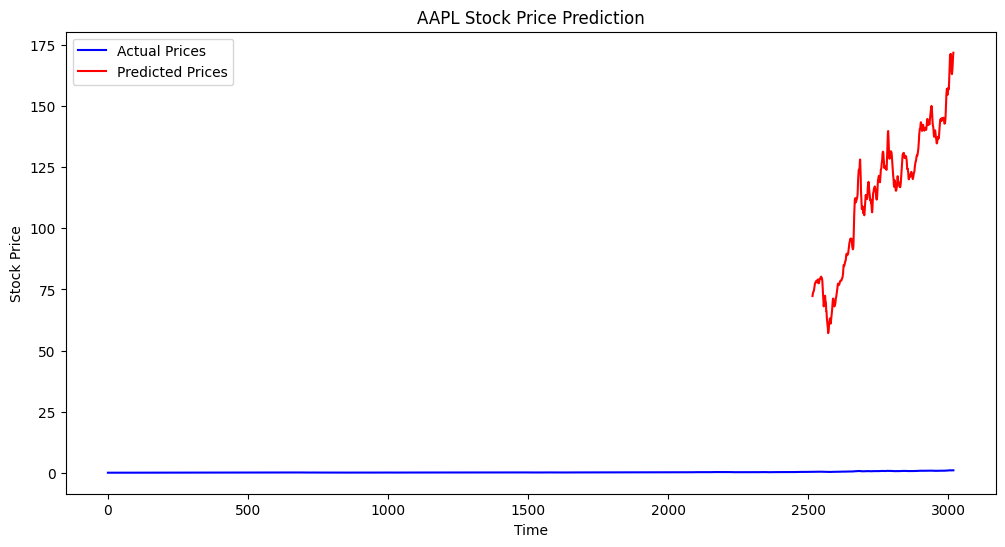

In [11]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual Prices', color='blue')
plt.plot(np.arange(train_size+seq_length, len(data)), predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.legend()
plt.show()